In [49]:
using MatrixProductBP
using JLD2, UnPack, Statistics
using Measurements
using Plots
using LaTeXStrings;

In [6]:
pgfplotsx();

In [96]:
Plots.default(
    grid = :off, box = :on,
    legend = :topright,
    widen = true,
    label = "",
    lw = 2,
    msc = :auto,
)

In [97]:
myblue = theme_palette(:auto)[1];

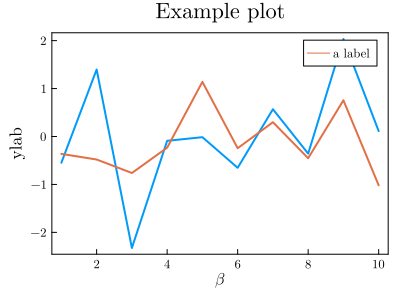

In [98]:
plot(randn(10), xlabel=L"\beta", ylabel="ylab", title="Example plot", size=(400,300))
plot!(randn(10), label="a label")

## Glauber RFIM

In [99]:
data = load("plot_data/glauber_RFIM.jld2")
@unpack T, m, m_mc = data;

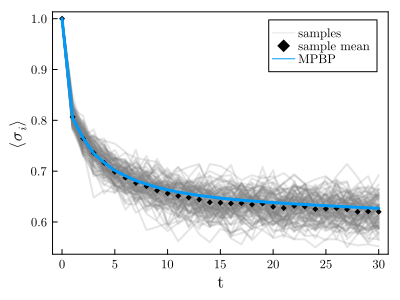

In [100]:
pl = plot(0:T, m_mc, label=permutedims(["samples"; fill("", length(m_mc)-1)]), c=:gray, la=0.2)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=3, msc=:auto, st=:scatter)
plot!(pl, 0:T, m, lw=3, xlabel="t", ylabel=L"\langle\sigma_i\rangle", msc=:auto, c=myblue,
    size=(400,300), xticks=0:5:T, ms=2, label="MPBP")

## Glauber uniform J, Erdos-Renyi

In [101]:
data = load("plot_data/glauber_erdos_renyi.jld2")
@unpack T, m_mc, m_avg, m_std, m_eq = data;

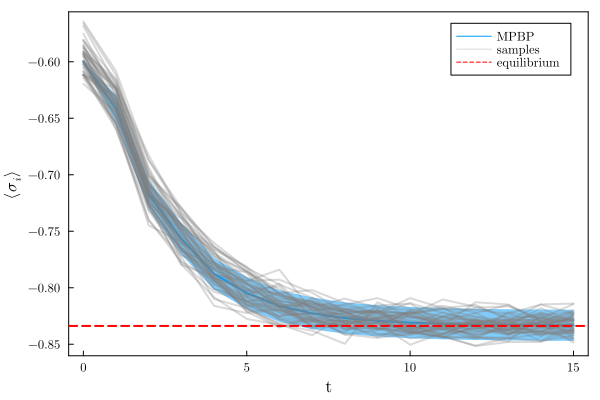

In [102]:
pl = plot(0:T, m_avg, ribbon=m_std, xlabel="t", ylabel=L"\langle\sigma_i\rangle", label="MPBP")
plot!(pl, 0:T, m_mc, label=permutedims(["samples"; fill("", length(m_mc)-1)]), c=:gray, la=0.3)
hline!(pl, [-m_eq.val], label="equilibrium", c=:red, ls=:dash, lw=2)

## Glauber uniform J, tilted at final time

In [103]:
data = load("plot_data/glauber_tilted.jld2")
@unpack T, magnetiz_free2, magnetiz_free, magnetiz_tilted = data;

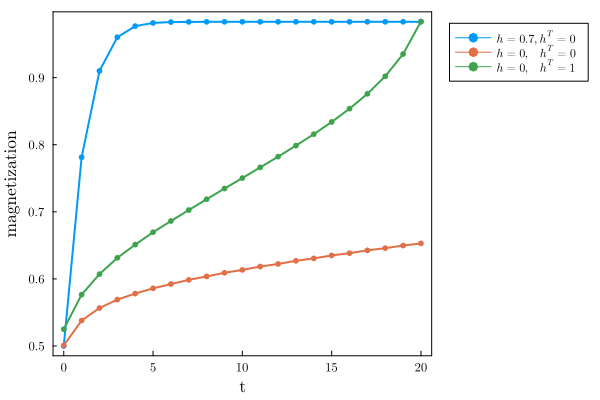

In [104]:
pl = plot(xlabel="t", ylabel="magnetization", xticks=0:5:T, legend=:outertopright)
plot!(pl, 0:T, magnetiz_free2, m=:o, label=L"h=0.7, h^T=0", ms=3)
plot!(pl, 0:T, magnetiz_free, m=:o, label=L"h=0, \quad h^T=0", ms=3)
plot!(pl, 0:T, magnetiz_tilted, m=:o, label=L"h=0, \quad h^T=1", ms=3)

## Glauber uniform J on infinite 8-regular graph

In [106]:
data = load("plot_data/glauber_infinite8RRG_smallbeta.jld2")
@unpack T, k, m_mc, m, m_eq = data;

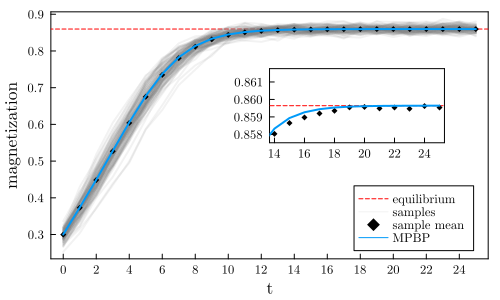

In [107]:
pl = hline([m_eq], c=:red, ls=:dash, lw=1, label="equilibrium")
plot!(pl, 0:T, sample(m_mc, 10^2), label=permutedims(["samples"; fill("", 10^2-1)]), c=:gray, la=0.1)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=3, msc=:auto, st=:scatter)
pl = plot!(pl, 0:T, m, xlabel="t", ylabel="magnetization", label="MPBP",
    size=(500,300), xticks=0:2:T, ms=3, 
    legend=:bottomright, msc=:auto, c=myblue, lw=2)

ylims = m_eq .+ 2e-3 .* (-1,1)
plot!(pl, xticks=14:2:T, ylims=ylims, xlims=(14,T),
    inset=(1, bbox(0.5, 0.23, 0.4, 0.3)), subplot=2#=, yticks=LinRange(ylims...,3)=#)
hline!(pl[2], [m_eq], c=:red, ls=:dash, lw=1, label="")
plot!(pl[2], 0:T, mean(m_mc), c=:black, m=:diamond, ms=3, msc=:auto, label="", st=:scatter)
plot!(pl[2], 0:T, m, ylabel="", label="", ms=3, msc=:auto, widen=true, c=blue, lw=2)

## SIS karate club network

In [108]:
data = load("plot_data/sis_karate_club_network.jld2")
@unpack T, ΔT, p29_bp, p29_mc, c, λ, ρ, svd_trunc = data;

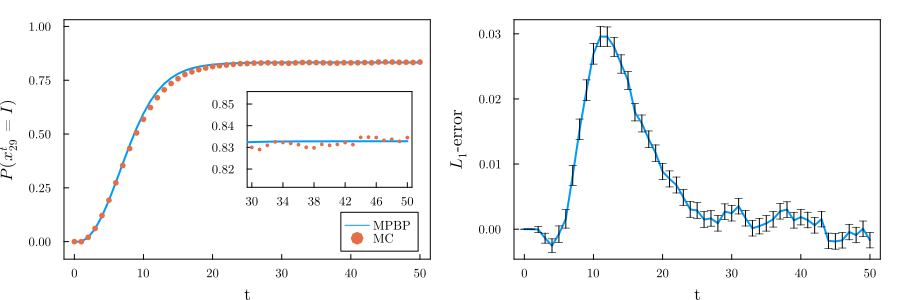

In [112]:
pl = plot(xlabel="t", xticks=0:10:T, ylabel=L"P(x_{29}^t=I)", ylims=(-0.05,1), legend=:bottomright)
plot!(pl, 0:ΔT:T, p29_bp, label="MPBP")
plot!(pl, 0:ΔT:T, getfield.(p29_mc, :val), m=:o, ms=3, label="MC", st=:scatter)
ylims = extrema((p29_bp[end], p29_mc[end].val)) .+ (-1, 1) .* 0.02
plot!(pl, xticks=T-20:4:T, ylims=ylims, xlims=(T-20,T),
    inset=(1, bbox(0.5, 0.3, 0.45, 0.4)), subplot=2)
plot!(pl[2], 0:ΔT:T, p29_bp, label="")
plot!(pl[2], 0:ΔT:T, getfield.(p29_mc, :val), m=:o, ms=2, label="", st=:scatter)

pl_err = plot(xlabel="t", xticks=0:10:T)
plot!(pl_err, 0:ΔT:T, p29_bp.-p29_mc, label="", ylabel=L"L_1"*"-error", msc=:black)

plot(pl, pl_err, size=(900,300), margin=3Plots.mm)